In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt

In [62]:
def get_data(path): # reads the input file containing absorbance measurements and returns an array of absorbance measurements
    data = pd.read_csv(path, sep=",", header = None)
    absData = []
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            absData.append(float(data.iat[i,j]))
    absData = np.asarray(absData)
    return absData

def show_normal_dist(path,inst): #reads in the array of absorbance measurement data and corresponding data generating instrument ID, then sorts, plots and labels the normal distribution and QQ plot
    data = sorted(path)
    fit = stats.norm.pdf(data, np.mean(data), np.std(data)) #fitting the data to a normal distribution
    plt.figure(figsize=(12,8))
    pl.plot(data,fit,'-o')
    pl.hist(data,normed=True) #generating histogram of absorbance data
    pl.suptitle(str(inst), fontsize = 15)
    pl.show()
    
    print(str(inst) + ' Mean: ' + str(np.mean(data)))
    print(str(inst) + ' SD: ' + str(np.std(data)))
    
    plt.figure(figsize=(12,8))
    stats.probplot(data, dist="norm", plot=pl) #generating Q-Q plot: a probability plot of sample data against the quantiles of the normal distribution
    pl.suptitle(str(inst), fontsize=15)
    pl.show()
    
def normality_test(path,inst): #print the statistic and the p value for the omnibus test of normality between the distribution passed as argument and a reference normal distribution: also takes corresponding data generating instrument ID for labeling output
    ndata = stats.mstats.normaltest(path)
    print(str(inst) + ': Normality test statistic= ' + str(ndata.statistic))
    print(str(inst) + ': Normality test p value= ' + str(ndata.pvalue))
    print'\n'
    
    
def get_mean_sd(path): #returns mean and sd for data passed as argument
    mean = np.mean(path)
    sd = np.std(path)
    return mean, sd

def r_metric(path,inst): #prints the coefficient of variation as a percentage for the data passed as argument: also takes corresponding data generating instrument ID for labeling output
    print (str(inst)+': Coefficient of Variation= '+ str((np.std(path))/(np.mean(path))*100) +' %')
    print'\n'

In [63]:
data1 = get_data('instrument_1.txt')
data2 = get_data('instrument_2.txt')
data3 = get_data('instrument_3.txt')
data4 = get_data('instrument_4.txt')
data5 = get_data('instrument_5.txt')

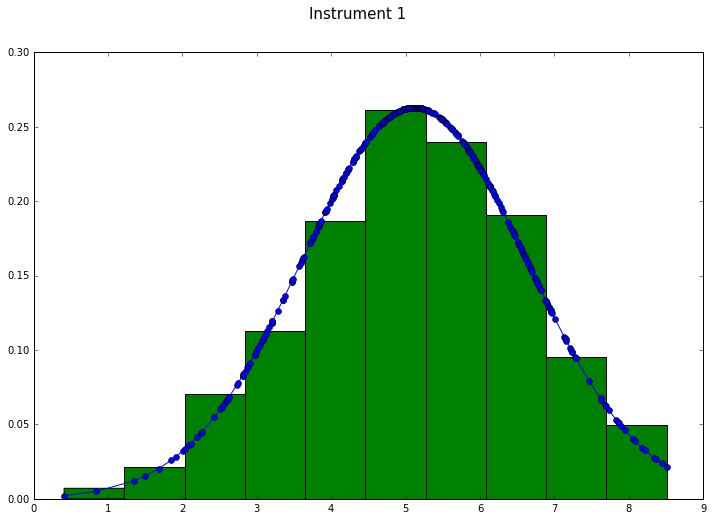

Instrument 1 Mean: 5.11691428571
Instrument 1 SD: 1.51743285794


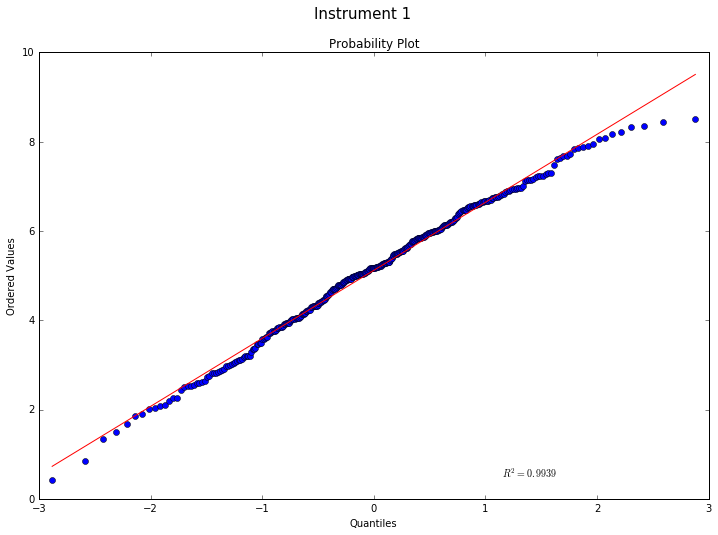

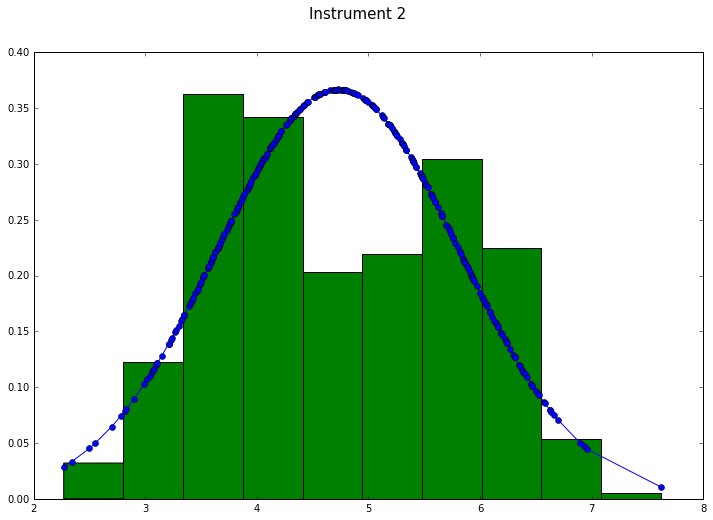

Instrument 2 Mean: 4.72611428571
Instrument 2 SD: 1.08767368456


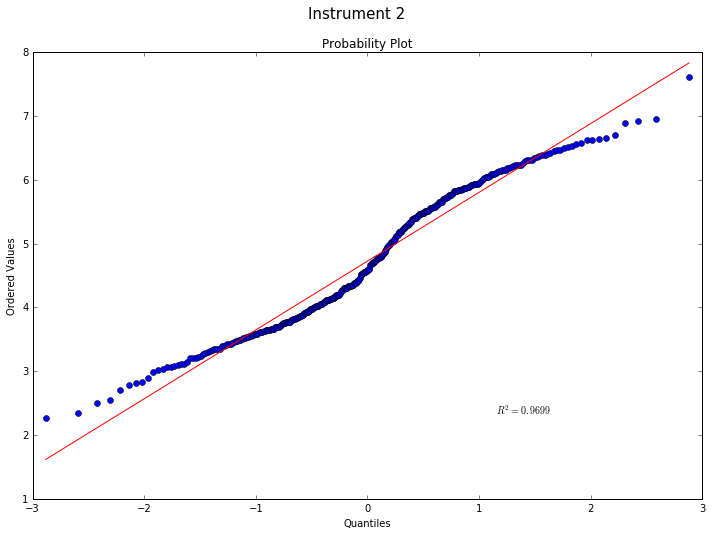

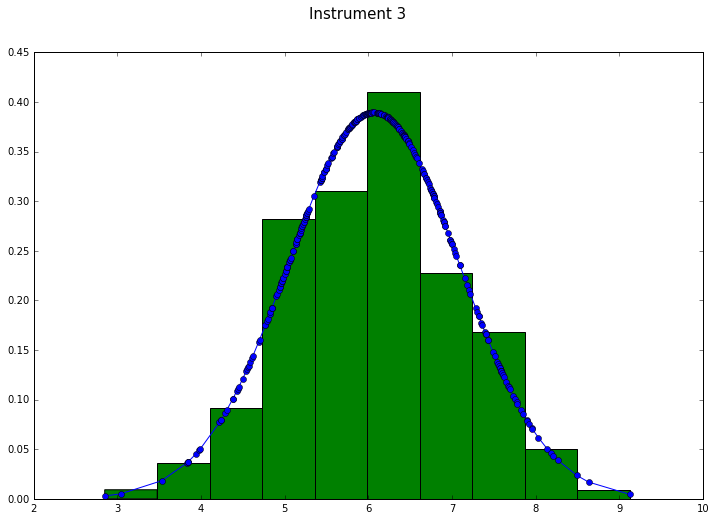

Instrument 3 Mean: 6.06465714286
Instrument 3 SD: 1.02412235438


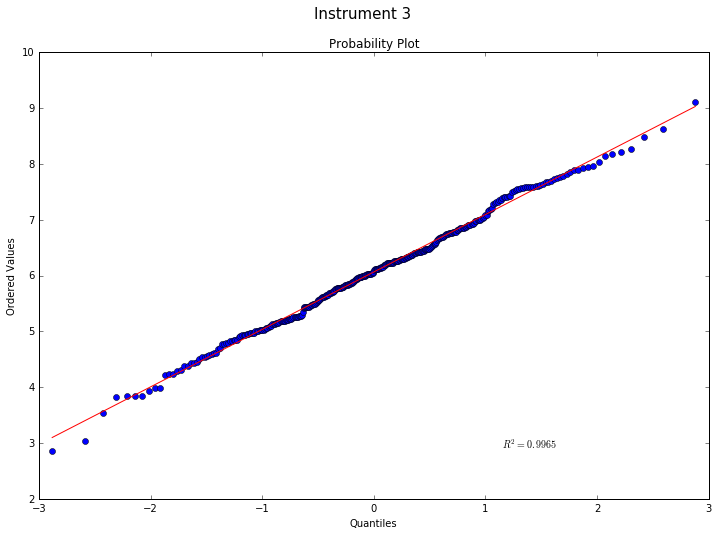

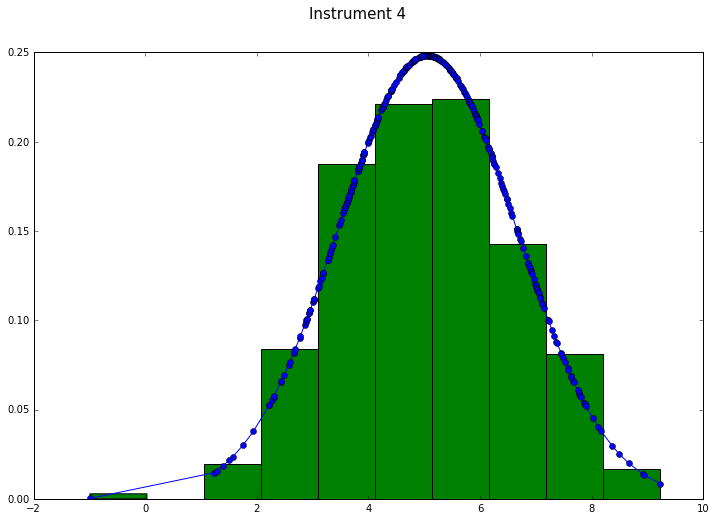

Instrument 4 Mean: 5.05662857143
Instrument 4 SD: 1.60681923751


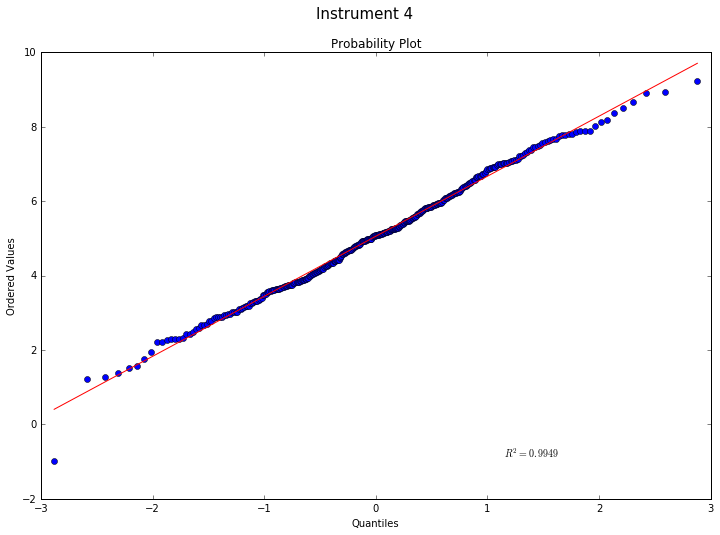

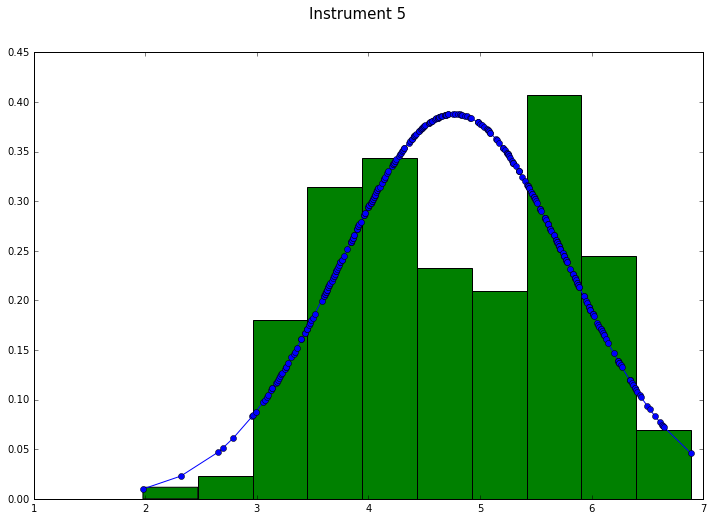

Instrument 5 Mean: 4.76505714286
Instrument 5 SD: 1.02797046769


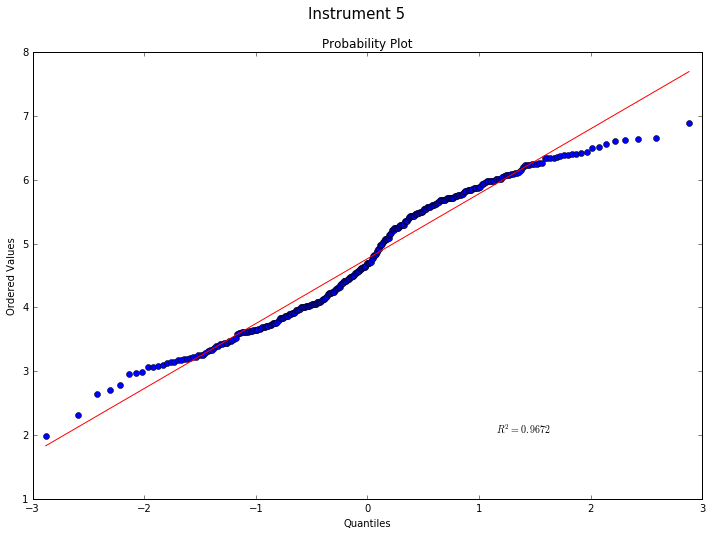

In [64]:
show_normal_dist(data1, 'Instrument 1') #Instrument title passed as string argument for plot labels
show_normal_dist(data2, 'Instrument 2')
show_normal_dist(data3, 'Instrument 3')
show_normal_dist(data4, 'Instrument 4')
show_normal_dist(data5, 'Instrument 5')

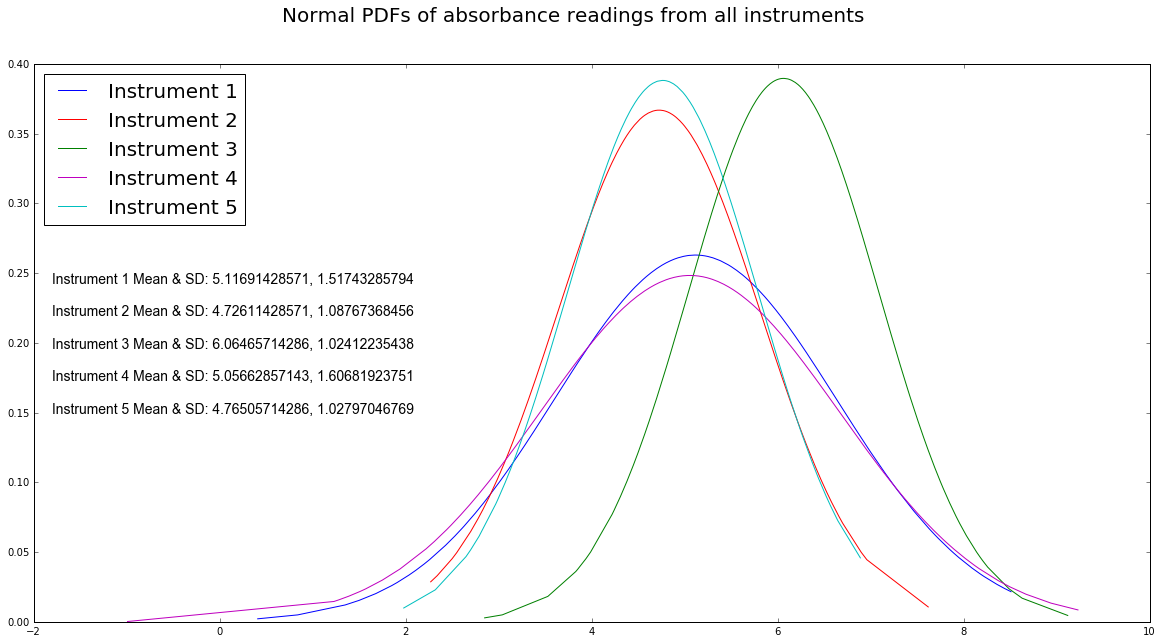

Instrument 1: Normality test statistic= 4.22337393489
Instrument 1: Normality test p value= 0.121033614347


Instrument 2: Normality test statistic= 74.1056501003
Instrument 2: Normality test p value= 8.09398773192e-17


Instrument 3: Normality test statistic= 0.0272262772247
Instrument 3: Normality test p value= 0.986479101127


Instrument 4: Normality test statistic= 0.169975893461
Instrument 4: Normality test p value= 0.918523355545


Instrument 5: Normality test statistic= 90.5761215472
Instrument 5: Normality test p value= 2.14607606004e-20




In [68]:
plt.figure(figsize=(20,10))

md1, sd1 = get_mean_sd(data1)

md2, sd2 = get_mean_sd(data2)

md3, sd3 = get_mean_sd(data3)

md4, sd4 = get_mean_sd(data4)

md5, sd5 = get_mean_sd(data5)

rdata1 = sorted(data1)
pdf = stats.norm.pdf(rdata1, md1, sd1) #fitting the data to a normal distribution
plt.plot(rdata1, pdf,'-b', label='Instrument 1') 

rdata2 = sorted(data2)
pdf = stats.norm.pdf(rdata2, md2, sd2) #fitting the data to a normal distribution
plt.plot(rdata2, pdf,'-r', label='Instrument 2') 

rdata3 = sorted(data3)
pdf = stats.norm.pdf(rdata3, md3, sd3) #fitting the data to a normal distribution
plt.plot(rdata3, pdf,'-g', label='Instrument 3') 


rdata4 = sorted(data4)
pdf = stats.norm.pdf(rdata4, md4, sd4) #fitting the data to a normal distribution
plt.plot(rdata4, pdf,'-m', label='Instrument 4') 


rdata5 = sorted(data5)
pdf = stats.norm.pdf(rdata5, md5, sd5) #fitting the data to a normal distribution
plt.plot(rdata5, pdf,'-c', label='Instrument 5') 
plt.legend(loc='upper left', fontsize = 20)
plt.suptitle("Normal PDFs of absorbance readings from all instruments", fontsize=20)
font = {'family': 'Arial',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
plt.text(-1.8, 0.15, 'Instrument 1 Mean & SD: '+str(md1)+', '+str(sd1)+'\n\n'
        +'Instrument 2 Mean & SD: '+str(md2)+', '+str(sd2)+'\n\n'
        +'Instrument 3 Mean & SD: '+str(md3)+', '+str(sd3)+'\n\n'
        +'Instrument 4 Mean & SD: '+str(md4)+', '+str(sd4)+'\n\n'
        +'Instrument 5 Mean & SD: '+str(md5)+', '+str(sd5), fontdict=font)
pl.show()

#Omnibus test of normality to quantify similarity of given distribution to a reference normal distribution with identical mean and std deviation: high p value and low test statistic imply that the null hypothesis (that both distributions being compared are identical) cannot be rejected: since one of the distributions is a reference normal distribution this quantifies "normality"  
normality_test(data1, 'Instrument 1') #Instrument title passed as string argument for output labels
normality_test(data2, 'Instrument 2')
normality_test(data3, 'Instrument 3')
normality_test(data4, 'Instrument 4')
normality_test(data5, 'Instrument 5')

In [66]:
#Coefficient of Variation (ratio of standard deviation to mean) as a dispersion metric to quantify reproducibility and identify instrument with max reproducibility (lowest CV% -> lowest dispersion -> highest reproducibility)
r_metric(data1, 'Instrument 1') #Instrument title passed as string argument for output labels
r_metric(data2, 'Instrument 2')
r_metric(data3, 'Instrument 3')
r_metric(data4, 'Instrument 4')
r_metric(data5, 'Instrument 5')

Instrument 1: Coefficient of Variation= 29.6552330802 %


Instrument 2: Coefficient of Variation= 23.014121513 %


Instrument 3: Coefficient of Variation= 16.8867312736 %


Instrument 4: Coefficient of Variation= 31.7764932665 %


Instrument 5: Coefficient of Variation= 21.5730984304 %




In [67]:
#2 sample Kolmogorov-Smirnov testing to quantify statistical similarity between instrument measurements: high p palue and low KS statistic imply the null hypothesis (that the two distributions are identical) cannot be rejected
comp12 = stats.ks_2samp(data1, data2)
comp13 = stats.ks_2samp(data1, data3)
comp14 = stats.ks_2samp(data1, data4)
comp15 = stats.ks_2samp(data1, data5)

comp23 = stats.ks_2samp(data2, data3)
comp24 = stats.ks_2samp(data2, data4)
comp25 = stats.ks_2samp(data2, data5)

comp34 = stats.ks_2samp(data3, data4)
comp35 = stats.ks_2samp(data3, data5)

comp45 = stats.ks_2samp(data4, data5)
 
print("Statistical similarity metric 1v2: "+"KS statistic= "+str(comp12.statistic)+' '+"p value= "+str(comp12.pvalue))
print("Statistical similarity metric 1v3: "+"KS statistic= "+str(comp13.statistic)+' '+"p value= "+str(comp13.pvalue))
print("Statistical similarity metric 1v4: "+"KS statistic= "+str(comp14.statistic)+' '+"p value= "+str(comp14.pvalue))
print("Statistical similarity metric 1v5: "+"KS statistic= "+str(comp15.statistic)+' '+"p value= "+str(comp15.pvalue))
print "\n"
print("Statistical similarity metric 2v3: "+"KS statistic= "+str(comp23.statistic)+' '+"p value= "+str(comp23.pvalue))
print("Statistical similarity metric 2v4: "+"KS statistic= "+str(comp24.statistic)+' '+"p value= "+str(comp24.pvalue))
print("Statistical similarity metric 2v5: "+"KS statistic= "+str(comp25.statistic)+' '+"p value= "+str(comp25.pvalue))
print "\n"
print("Statistical similarity metric 3v4: "+"KS statistic= "+str(comp34.statistic)+' '+"p value= "+str(comp34.pvalue))
print("Statistical similarity metric 3v5: "+"KS statistic= "+str(comp35.statistic)+' '+"p value= "+str(comp35.pvalue))
print "\n"
print("Statistical similarity metric 4v5: "+"KS statistic= "+str(comp45.statistic)+' '+"p value= "+str(comp45.pvalue))

Statistical similarity metric 1v2: KS statistic= 0.171428571429 p value= 5.58371073145e-05
Statistical similarity metric 1v3: KS statistic= 0.302857142857 p value= 1.22223797527e-14
Statistical similarity metric 1v4: KS statistic= 0.0571428571429 p value= 0.604893979195
Statistical similarity metric 1v5: KS statistic= 0.191428571429 p value= 4.19094023221e-06


Statistical similarity metric 2v3: KS statistic= 0.454285714286 p value= 2.08839668525e-32
Statistical similarity metric 2v4: KS statistic= 0.168571428571 p value= 7.89698750705e-05
Statistical similarity metric 2v5: KS statistic= 0.0514285714286 p value= 0.732860385505


Statistical similarity metric 3v4: KS statistic= 0.342857142857 p value= 1.21507100617e-18
Statistical similarity metric 3v5: KS statistic= 0.431428571429 p value= 2.86475024009e-29


Statistical similarity metric 4v5: KS statistic= 0.182857142857 p value= 1.31664337242e-05
